## StackedEnsemble Experiments

Below is a basic overview of the details of the best model for predict cancer prevalance using pollutants as inputs.
| Parameter                 | Actual Value                              |
|---------------------------|-------------------------------------------|
| model_id                  | GBM_grid_1_AutoML_1_20241113_70146_model_225 |
| nfolds                    | 5                                         |
| keep_cross_validation_models | False                                  |
| score_tree_interval       | 5                                         |
| fold_assignment           | Modulo                                   |
| response_column           | Data_Value                               |
| ntrees                    | 43                                        |
| max_depth                 | 6                                         |
| min_rows                  | 15.0                                      |
| stopping_metric           | deviance                                 |
| stopping_tolerance        | 0.020558557070186494                      |
| max_runtime_secs          | 106.40625                                |
| seed                      | 200                                       |
| learn_rate                | 0.1                                       |
| distribution              | gaussian                                  |
| sample_rate               | 0.9                                       |
| col_sample_rate           | 0.7                                       |
| col_sample_rate_per_tree  | 0.7                                       |
| histogram_type            | UniformAdaptive                          |
| categorical_encoding      | Enum                                      |

## Performance
| Metric                   | Value   |
|--------------------------|---------|
| Mean Squared Error (MSE) | 0.182   |
| Root Mean Squared Error (RMSE) | 0.427   |
| Mean Absolute Error (MAE) | 0.298   |
| R-squared (R²)           | 0.418   |
| Mean Residual Deviance   | 0.182   |

# Code
Main technology used was H2O's AutoML.

In [1]:
import os
os.environ["JAVA_HOME"] = r"C:\Program Files\Java\jdk-17"
os.environ["PATH"] = r"C:\Program Files\Java\jdk-17\bin;" + os.environ["PATH"]

In [2]:
!java -version

java version "17.0.11" 2024-04-16 LTS
Java(TM) SE Runtime Environment (build 17.0.11+7-LTS-207)
Java HotSpot(TM) 64-Bit Server VM (build 17.0.11+7-LTS-207, mixed mode, sharing)


In [3]:
import h2o
h2o.init(port=24323)

Checking whether there is an H2O instance running at http://localhost:24323..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.11+7-LTS-207, mixed mode, sharing)
  Starting server from C:\Users\Paul\anaconda3\envs\h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Paul\AppData\Local\Temp\tmpw7fah8gk
  JVM stdout: C:\Users\Paul\AppData\Local\Temp\tmpw7fah8gk\h2o_Paul_started_from_python.out
  JVM stderr: C:\Users\Paul\AppData\Local\Temp\tmpw7fah8gk\h2o_Paul_started_from_python.err
  Server is running at http://127.0.0.1:24323
Connecting to H2O server at http://127.0.0.1:24323 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_Paul_y6uap2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [4]:
model_path = "../saved_models/GBM_grid_1_AutoML_1_20241113_70146_model_225"
saved_model = h2o.load_model(model_path)

In [5]:
import pandas as pd
df = pd.read_csv('../data_preprocessing/pivoted_cancer.csv')
df.columns

Index(['State', 'State-County', '1,1,2,2-Tetrachloroethane', '1,3-Butadiene',
       '1,4-Dichlorobenzene', '2,2,4-Trimethylpentane', 'Acetaldehyde',
       'Acrolein', 'Ammonia', 'Arsenic Compounds', 'Benzene',
       'Beryllium Compounds', 'Cadmium Compounds', 'Carbon Dioxide',
       'Carbon Monoxide', 'Carbon Tetrachloride', 'Chlorobenzene',
       'Chloroform', 'Chromium Compounds', 'Cobalt Compounds', 'Cumene',
       'Ethyl Chloride', 'Ethylbenzene', 'Formaldehyde', 'Hexane',
       'Lead Compounds', 'Manganese Compounds', 'Mercury Compounds', 'Methane',
       'Methanol', 'Methyl Isobutyl Ketone', 'Methylene Chloride',
       'Naphthalene', 'Nickel Compounds', 'Nitrogen Oxides', 'Nitrous Oxide',
       'PM10 Primary (Filt + Cond)', 'PM2.5 Primary (Filt + Cond)', 'Phenol',
       'Polycyclic Organic Matter', 'Propionaldehyde', 'Selenium Compounds',
       'Styrene', 'Sulfur Dioxide', 'Toluene', 'Vinyl Chloride',
       'Volatile Organic Compounds', 'Xylenes (Mixed Isomers)', 'Da

In [6]:
h2o_df = h2o.H2OFrame(df)

splits = h2o_df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
predictions = saved_model.predict(test)
print(predictions)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict
  6.86218
  7.11347
  6.53439
  6.75701
  6.74593
  6.77077
  6.72989
  7.28185
  6.63527
  6.497
[580 rows x 1 column]



In [8]:
print(saved_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20241113_70146_model_225


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    43                 43                          21934                  6            6            6             12            41            31

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.09852770356198388
RMSE: 0.31389122887074095
MAE: 0.217609364403977
RMSLE: 0.042041675856796884
Mean Residual Deviance: 0.09852770356198388

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.16822221876551482
RMSE: 0.4101490201932888
MAE: 0.2880653067528727
RMSLE: 0.05465904386217353
Mean Residual Deviance

In [9]:
performance = saved_model.model_performance(test)
print("Mean Squared Error (MSE):", performance.mse())
print("Root Mean Squared Error (RMSE):", performance.rmse())
print("Mean Absolute Error (MAE):", performance.mae())
print("R-squared (R²):", performance.r2())
print("Mean Residual Deviance:", performance.mean_residual_deviance())

Mean Squared Error (MSE): 0.18203819688646047
Root Mean Squared Error (RMSE): 0.42665934524683796
Mean Absolute Error (MAE): 0.2975635717545175
R-squared (R²): 0.4182321144848703
Mean Residual Deviance: 0.18203819688646047


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\Users\Paul\anaconda3\envs\h2o\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\Paul\anaconda3\envs\h2o\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


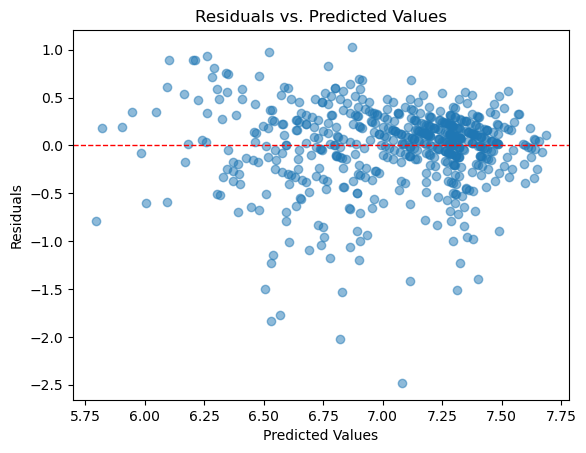

In [12]:
import matplotlib.pyplot as plt

# Get predictions and residuals
predictions = saved_model.predict(test).as_data_frame()["predict"]
actuals = test["Data_Value"].as_data_frame()["Data_Value"]  # Replace 'response_column' with your actual column name
residuals = actuals - predictions

# Plot
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

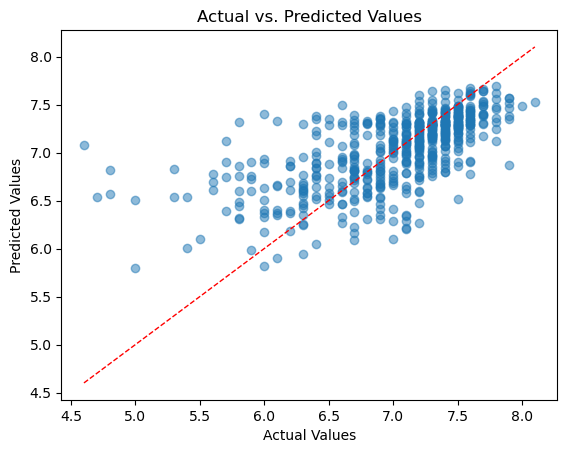

In [13]:
# Plot
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], color="red", linestyle="--", linewidth=1)  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

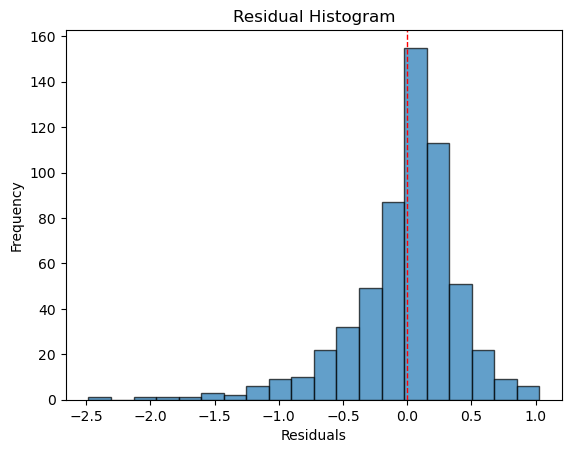

In [14]:
# Plot
plt.hist(residuals, bins=20, edgecolor="k", alpha=0.7)
plt.axvline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()

In [9]:
saved_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_1_20241113_70146_model_225',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_1_20241113_70146_model_225'},
  'input': None},
 'training_frame': {'default': None, 'actual': None, 'input': None},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 5, 'input': 5},
 'keep_cross_validation_models': {'default': True,
  'actual': False,
  'input': False},
 'keep_cross_validation_predictions': {'default': False,
  'actual': True,
  'input': True},
 'keep_cross_validation_fold_assignment': {'default': False,
  'actual': False,
  'input': False},
 'score_each_iteration': {'default': False, 'actual': False, 'input': False},
 'score_tree_interval': {'default': 0, 'actual': 5, 'input': 5},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo', 'input': '